# 第 5 章　正态线性模型｜用 Python 动手学统计学

## 第 3 节　含有多个解释变量的模型

### 1. 环境准备

In [2]:
# 用于数值计算的库
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 用于绘图的库
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 用于估计统计模型的库 (部分版本会报出警告信息)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 设置浮点数打印精度
%precision 3
# 在Jupyter Notebook里显示图形
%matplotlib inline

In [3]:
# 读入数据
sales = pd.read_csv("5-3-1-lm-model.csv")
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


### 2. 实现：数据可视化

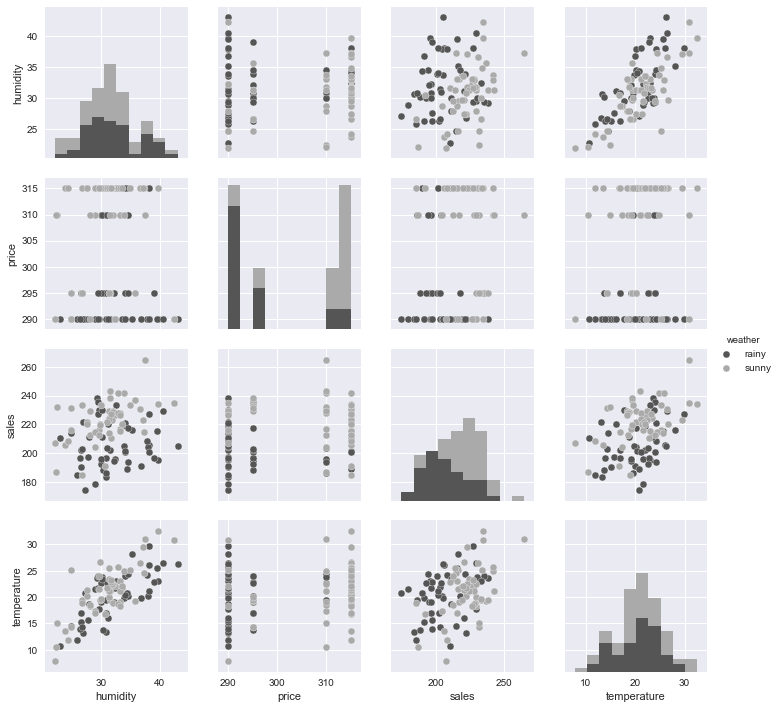

In [4]:
# 数据可视化
sns.pairplot(data = sales, hue = "weather", 
             palette="gray")

### 3. 错误的分析：建立只有 1 个变量的模型

In [5]:
# 只使用价格这 1 种解释变量进行建模
lm_dame = smf.ols("sales ~ price", sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [6]:
# 价格的系数与 0 存在显著性差异
print(sm.stats.anova_lm(lm_dame, typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


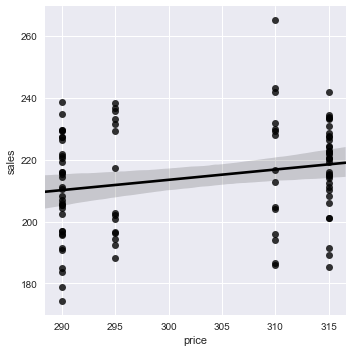

In [7]:
# 价格与销售额的关系
sns.lmplot(x = "price", y = "sales", data = sales,
           scatter_kws = {"color": "black"},
           line_kws    = {"color": "black"})

### 4. 分析解释变量之间的关系

In [8]:
# 计算各天气下的均值
print(sales.groupby("weather").mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


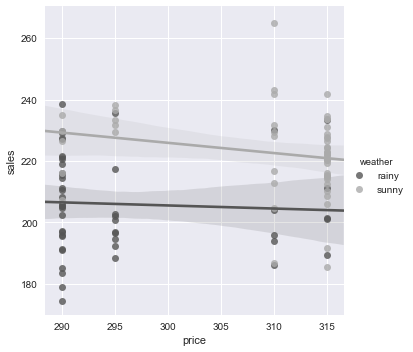

In [9]:
# 不同天气中销售额—价格回归直线
sns.lmplot(x = "price", y = "sales", data = sales, 
           hue="weather", palette='gray')

### 5. 实现：多解释变量的模型

In [10]:
# 估计多解释变量的模型
lm_sales = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    data=sales).fit()
# 估计的结果
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

### 6. 错误的分析：使用普通方差分析

In [11]:
# 普通方差分析
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [12]:
# 改变解释变量的顺序
lm_sales_2 = smf.ols(
    "sales ~ weather + temperature + humidity + price",
    data=sales).fit()
# 检验结果
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


### 7. 实现：回归系数的 t 检验

In [13]:
# 模型 1 的回归系数的 t 检验
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [14]:
# 模型 2 的回归系数的 t 检验
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


### 9. 模型选择与方差分析

In [15]:
# 空模型的残差平方和
mod_null = smf.ols("sales ~ 1", sales).fit()
resid_sq_null = sp.sum(mod_null.resid ** 2)
resid_sq_null

28968.526

In [16]:
# 天气模型的残差平方和
mod_1 = smf.ols("sales ~ weather", sales).fit()
resid_sq_1 = sp.sum(mod_1.resid ** 2)
resid_sq_1

21917.565

In [17]:
# 残差平方和的差
resid_sq_null - resid_sq_1

7050.961

In [18]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [19]:
# "天气 + 湿度" 模型的残差平方和
mod_2 = smf.ols(
    "sales ~ weather + humidity", sales).fit()
resid_sq_2 = sp.sum(mod_2.resid ** 2)
resid_sq_2

20137.964

In [20]:
# 残差平方和的差
resid_sq_1 - resid_sq_2

1779.601

In [21]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [22]:
# "天气 + 气温" 模型的残差平方和
mod_2_2 = smf.ols(
    "sales ~ weather + temperature", sales).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)
resid_sq_2_2

18102.786

In [23]:
# "天气 + 气温 + 湿度" 模型的残差平方和
mod_3_2 = smf.ols(
    "sales ~ weather + temperature + humidity",
    sales).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)
resid_sq_3_2

18061.119

In [24]:
resid_sq_2_2 - resid_sq_3_2

41.667

In [25]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


### 11. 实现：Type II ANOVA

In [26]:
# 包含所有解释变量的模型的残差平方和
mod_full = smf.ols(
    "sales ~ weather + humidity + temperature + price",
    sales).fit()
resid_sq_full = sp.sum(mod_full.resid ** 2)
resid_sq_full

17242.717

In [27]:
# 不含湿度的模型的残差平方和
mod_non_humi = smf.ols(
    "sales ~ weather + temperature + price", 
    sales).fit()
resid_sq_non_humi = sp.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

17299.142

In [28]:
# 调整平方和
resid_sq_non_humi - resid_sq_full

56.425

In [29]:
# Type II ANOVA
print(sm.stats.anova_lm(mod_full, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


In [30]:
# 对比这两个模型
mod_full.compare_f_test(mod_non_humi)

(0.311, 0.578, 1.000)

### 13. 实现：变量选择与模型选择

In [31]:
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [32]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

### 14. 实现：用 AIC 进行变量选择

In [33]:
print("包含所有变量的模型：", mod_full.aic.round(3))
print("不含湿度的模型　　：", mod_non_humi.aic.round(3))

包含所有变量的模型： 808.785
不含湿度的模型　　： 807.112
